In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Titanic-Dataset.csv')

data['Age'].fillna(data['Age'].median())
data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'].fillna(data['Fare'].median())

data.drop(columns=['Cabin'])

data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])
data['Title'] = encoder.fit_transform(data['Title'])

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [39]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

final_pred = np.round((rf_pred + xgb_pred) / 2)

print("Ensemble Model Accuracy:", accuracy_score(y_test, final_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred))


Ensemble Model Accuracy: 0.8212290502793296
Confusion Matrix:
 [[95 10]
 [22 52]]


In [43]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


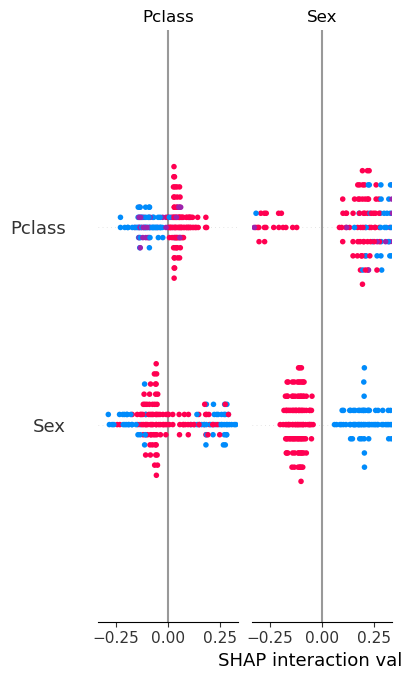

In [45]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


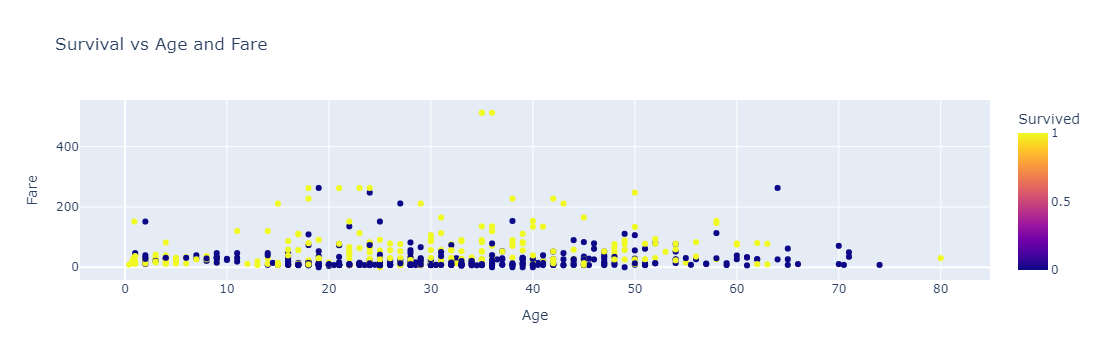

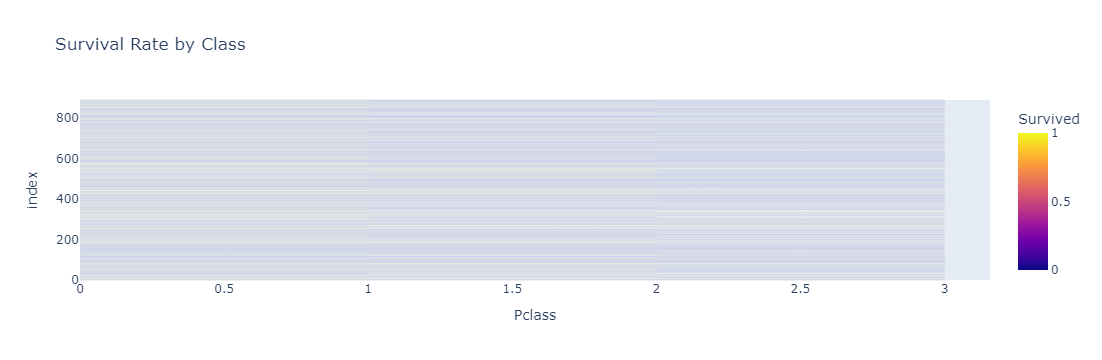

In [47]:
import plotly.express as px


fig = px.scatter(data, x='Age', y='Fare', color='Survived', title="Survival vs Age and Fare")
fig.show()


fig2 = px.bar(data_frame=data, x='Pclass', color='Survived', title="Survival Rate by Class")
fig2.show()


In [70]:
pip install matplotlib networkx


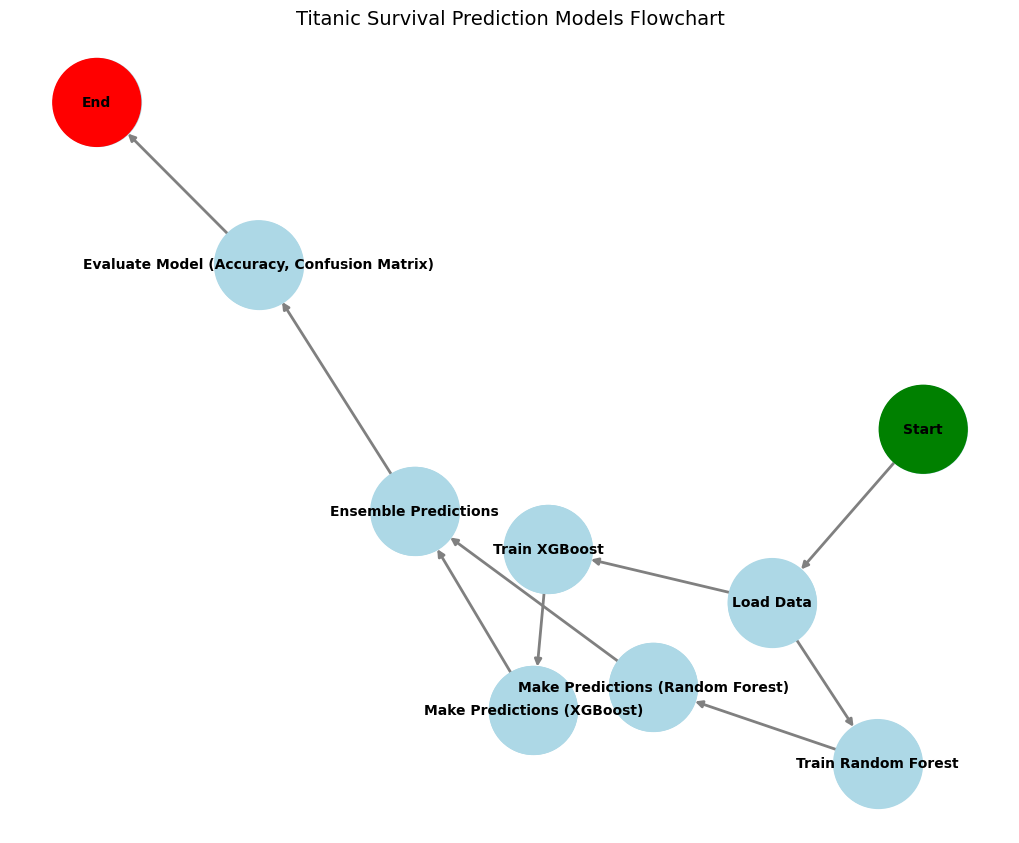

In [98]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_node("Start", style="filled", fillcolor="green", shape="ellipse")
G.add_node("Load Data")
G.add_node("Train Random Forest")
G.add_node("Train XGBoost")
G.add_node("Make Predictions (Random Forest)")
G.add_node("Make Predictions (XGBoost)")
G.add_node("Ensemble Predictions")
G.add_node("Evaluate Model (Accuracy, Confusion Matrix)")
G.add_node("End", style="filled", fillcolor="red", shape="ellipse")

G.add_edges_from([
    ("Start", "Load Data"),
    ("Load Data", "Train Random Forest"),
    ("Load Data", "Train XGBoost"),
    ("Train Random Forest", "Make Predictions (Random Forest)"),
    ("Train XGBoost", "Make Predictions (XGBoost)"),
    ("Make Predictions (Random Forest)", "Ensemble Predictions"),
    ("Make Predictions (XGBoost)", "Ensemble Predictions"),
    ("Ensemble Predictions", "Evaluate Model (Accuracy, Confusion Matrix)"),
    ("Evaluate Model (Accuracy, Confusion Matrix)", "End")
])

pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 8))

nx.draw(G, pos, with_labels=True, node_size=4000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', width=2)

node_colors = ['green' if node == 'Start' else 'red' if node == 'End' else 'lightblue' for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=4000)

plt.title("Titanic Survival Prediction Models Flowchart", fontsize=14)
plt.show()


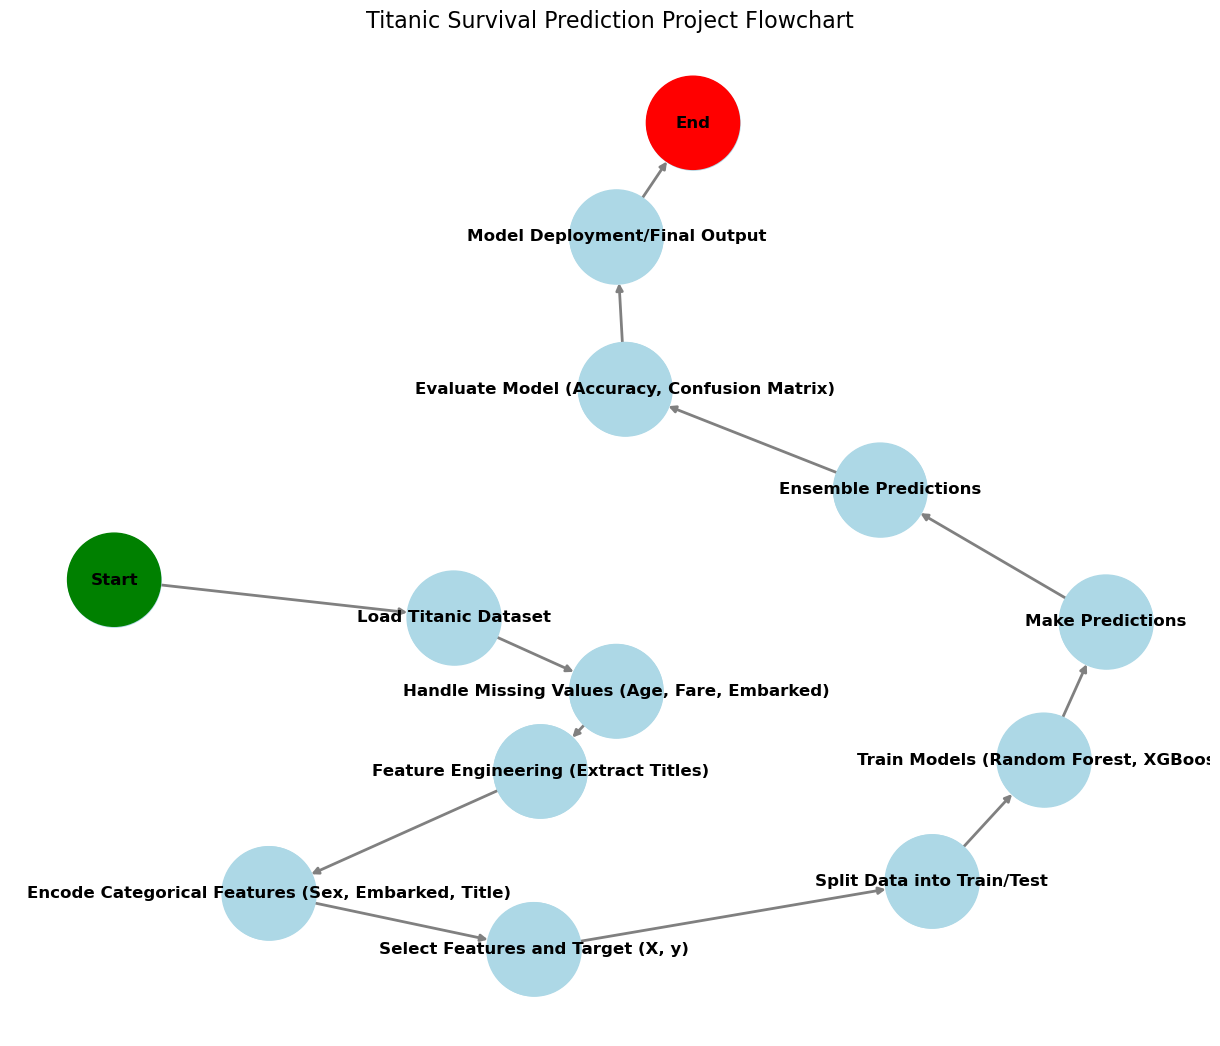

In [94]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_node("Start", style="filled", fillcolor="green", shape="ellipse")
G.add_node("Load Titanic Dataset")
G.add_node("Handle Missing Values (Age, Fare, Embarked)")
G.add_node("Feature Engineering (Extract Titles)")
G.add_node("Encode Categorical Features (Sex, Embarked, Title)")
G.add_node("Select Features and Target (X, y)")
G.add_node("Split Data into Train/Test")
G.add_node("Train Models (Random Forest, XGBoost)")
G.add_node("Make Predictions")
G.add_node("Ensemble Predictions")
G.add_node("Evaluate Model (Accuracy, Confusion Matrix)")
G.add_node("Model Deployment/Final Output")
G.add_node("End", style="filled", fillcolor="red", shape="ellipse")

G.add_edges_from([
    ("Start", "Load Titanic Dataset"),
    ("Load Titanic Dataset", "Handle Missing Values (Age, Fare, Embarked)"),
    ("Handle Missing Values (Age, Fare, Embarked)", "Feature Engineering (Extract Titles)"),
    ("Feature Engineering (Extract Titles)", "Encode Categorical Features (Sex, Embarked, Title)"),
    ("Encode Categorical Features (Sex, Embarked, Title)", "Select Features and Target (X, y)"),
    ("Select Features and Target (X, y)", "Split Data into Train/Test"),
    ("Split Data into Train/Test", "Train Models (Random Forest, XGBoost)"),
    ("Train Models (Random Forest, XGBoost)", "Make Predictions"),
    ("Make Predictions", "Ensemble Predictions"),
    ("Ensemble Predictions", "Evaluate Model (Accuracy, Confusion Matrix)"),
    ("Evaluate Model (Accuracy, Confusion Matrix)", "Model Deployment/Final Output"),
    ("Model Deployment/Final Output", "End")
])

pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(12, 10))

nx.draw(G, pos, with_labels=True, node_size=4500, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray', width=2)

node_colors = ['green' if node == 'Start' else 'red' if node == 'End' else 'lightblue' for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=4500)

plt.title("Titanic Survival Prediction Project Flowchart", fontsize=16)
plt.axis('off')
plt.show()
